In [ ]:
# Performed Linear Regression on the given dataset to predict the charges based on 6 attributes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.shape

(1338, 7)

In [8]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
label_encoder_obj = LabelEncoder()

In [13]:
array_columns = ['sex','smoker','region']

In [14]:
for i in array_columns:
    data[i]=label_encoder_obj.fit_transform(data[i])

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
data = data.rename(columns = {'charges' : 'target'})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,target
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
y = data['target']

In [22]:
x = data.drop('target', axis =1)

In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: target, Length: 1338, dtype: float64

In [24]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [25]:
x.shape

(1338, 6)

In [26]:
y.shape

(1338,)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [28]:
x_train.shape

(1003, 6)

In [29]:
x_test.shape

(335, 6)

In [30]:
y_train.shape

(1003,)

In [31]:
y_test.shape

(335,)

In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.7552947735160869

In [44]:
model.coef_

array([  260.27915977,   -39.49567875,   324.16838833,   461.48501411,
       23343.64009002,  -215.95578341])

In [45]:
model.intercept_

-11850.246579754785

In [46]:
data.corr()

,age,sex,bmi,children,smoker,region,target
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
target,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


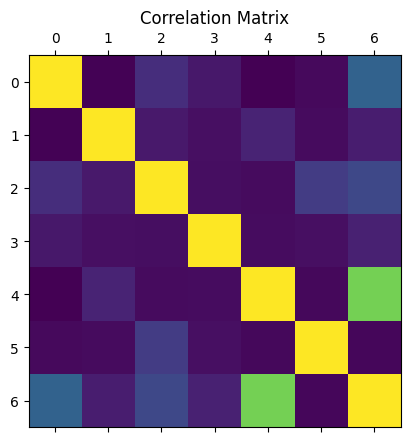

In [47]:
plt.matshow(data.corr())
plt.title("Correlation Matrix")
plt.show()

In [55]:
#Ridge Regression
ridge_model = Ridge(alpha=0.01, random_state =0)

In [56]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01, random_state=0)

In [57]:
y_pred_ridge = ridge_model.predict(x_test)

In [58]:
mean_squared_error(y_test,y_pred_ridge)

37344177.85312285

In [59]:
r2_score(y_test,y_pred_ridge)

0.7552889269495502

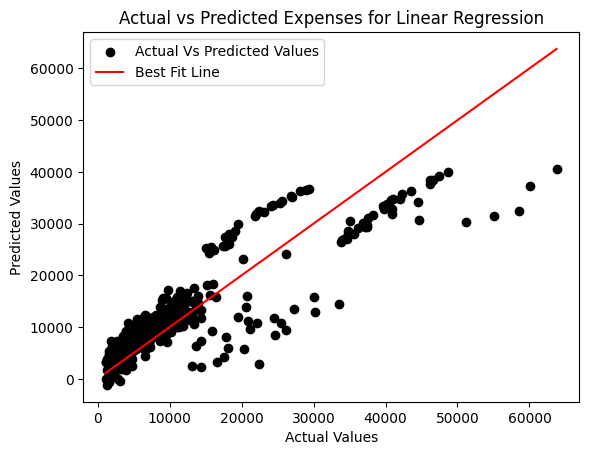

In [61]:
plt.scatter(y_test,y_pred, color = 'black', label = "Actual Vs Predicted Values")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color = 'red', label = 'Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Expenses for Linear Regression')
plt.legend()
plt.show()